# $\color{Green}{\text{Fundamentals of Inference and Learning}}$ 
## Homework 1 
### Exercise 1 : Statistical Inference and Maximum Likelihood

## 1.
First we need to compute $Z(\lambda)$ in order to have a normalized distribution. We therefore have:
$$
\int_{-\infty}^{-\infty} p_\lambda (x_i)dx_i = 1 
\Leftrightarrow \int_{1}^{20} \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i = 1
$$
By integrating:
$$
-\frac{\lambda}{Z(\lambda)}*(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}}) = 1
$$
$Z(\lambda)$ is found to be : 
$$
    Z(\lambda) = -\lambda * (e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}})
$$

Now compute $\mathbb{E}[X]$
$$
\mathbb{E}[X] = \int_{1}^{20} x_i \cdot \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i
$$
Let's integrate by parts:
$$
\mathbb{E}[X] = \frac{1}{Z(\lambda)} \{ -\lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] - \lambda \int_{1}^{20} e^{\frac{-x_i}{\lambda}}dx_i\}
$$
Finally:
$$
    \mathbb{E}[X] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$ 

Now lets compute $\partial_\lambda log Z(\lambda)$:
$$
\partial_\lambda log Z(\lambda) = \frac{1}{\lambda(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}})} [-(e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}})-\lambda(\frac{20e^{-\frac{20}{\lambda}}}{\lambda^2}-\frac{-e^{-\frac{1}{\lambda}}}{\lambda^2}] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$

By comparing the previous result found for $\mathbb{E}[X]$, the final expression is:
$$
\mathbb{E}[X] = \lambda^2 \cdot \partial_\lambda Z(\lambda)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
exp = np.exp

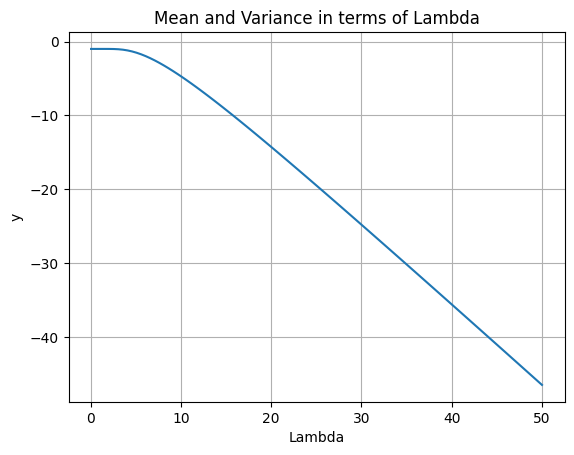

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
lambda_values = np.linspace(0.05, 50, 100)
# Define the function z(lambda)
z = -lambda_values * (exp(-20 / lambda_values) - exp(-1 / lambda_values))
mean = -lambda_values / z * (20 * exp(-20 / lambda_values) + exp(-1 / lambda_values))

# Plot the results
plt.plot(lambda_values, mean)
#plt.plot(lambda_values, variance, color='g')
plt.xlabel('Lambda')
plt.ylabel('y')
plt.title('Mean and Variance in terms of Lambda')
plt.grid(True)
plt.show()


## 3.

In [32]:
def log_likelihood(lambda_, obs):
    log_likelihood_value = -len(obs) * np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
    log_likelihood_value = log_likelihood_value - np.sum(obs) / lambda_

    return log_likelihood_value

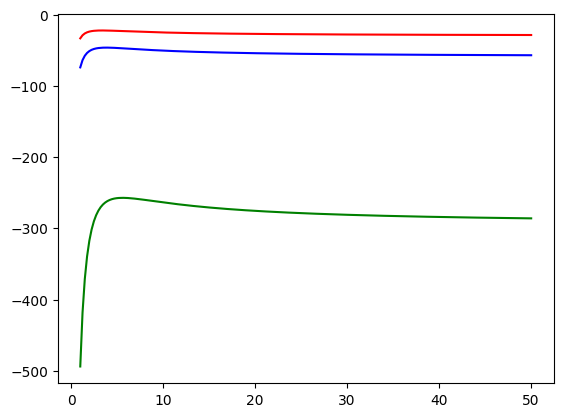

In [35]:
#parameters
lambda_ = 10
n_samples = [10,20,100]
tab_lambda = np.linspace(1,50,200)
color = ['r','b','g']
for index, N in enumerate(n_samples):
    obs = np.random.exponential(scale=lambda_, size=N)
    obs[obs > 20] = 0
    obs[obs < 1] = 0
    LL_func = np.array([log_likelihood(lbd, obs) for lbd in tab_lambda])
    plt.plot(tab_lambda,LL_func, color=color[index])
plt.show()

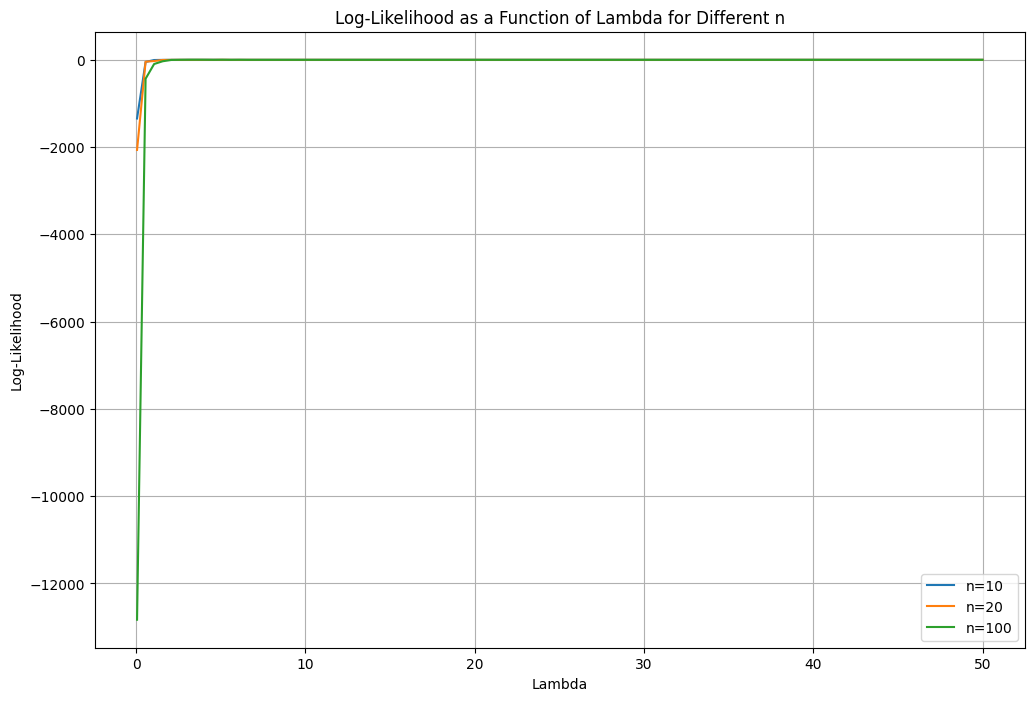

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the log-likelihood
def log_likelihood(lmbda, observations):
    Z = -lmbda * (np.exp(-20 / lmbda) - np.exp(-1 / lmbda))
    log_likelihood_value = len(observations) * np.log(Z) - np.sum(observations) / lmbda
    return log_likelihood_value

# Function to simulate n observations
def simulate_observations(lmbda, n):
    # Simulate exponential random variables
    observations = np.random.exponential(scale=1/lmbda, size=n)
    # Filter observations to be in the range [1, 20]
    observations = observations[(observations >= 1) & (observations <= 20)]
    return observations

# Range of λ values
lambda_values = np.linspace(0.05, 50, 100)

# Number of observations for each case
n_values = [10, 20, 100]

# Plot the log-likelihood for different n values
plt.figure(figsize=(12, 8))

for n in n_values:
    log_likelihood_values = []
    # Simulate observations for a fixed λ
    for lmbda in lambda_values:
        observations = simulate_observations(lmbda, n)
        log_likelihood_value = log_likelihood(lmbda, observations)
        log_likelihood_values.append(log_likelihood_value)

    plt.plot(lambda_values, log_likelihood_values, label=f'n={n}')

plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood as a Function of Lambda for Different n')
plt.legend()
plt.grid(True)
plt.show()
